# Mesclagem de dataframes

In [180]:
import pandas as pd
import numpy as np

In [181]:
df = pd.read_csv("PEDE_PASSOS_DATASET_FIAP.csv", sep= ";")
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


In [182]:
df.shape

(1349, 69)

### Criação de dataframes específicos por ano

In [183]:
df_2020 = df[[col for col in df.columns if "2020" in col]].copy() #filtra as colunas com "_2020" e adiciona em um novo df
df_2020.columns = [col.replace("_2020", "") for col in df_2020.columns] # retira caractere numérico da coluna para padronizar
df_2020["NOME"] = df["NOME"] #adiciona identificador do aluno
df_2020["ANO_PESQUISA"] = 2020 #adiciona coluna de ano
cols_nulo_2020 = df_2020.columns.difference(['NOME', 'ANO_PESQUISA']) # excluir
df_2020 = df_2020.dropna(how='all', subset=cols_nulo_2020).reset_index() # Excluir linhas onde todas as colunas no subset especificado são NaN

df_2021 = df[[col for col in df.columns if "2021" in col]].copy() #filtra as colunas com "_2021" e adiciona em um novo df
df_2021.columns = [col.replace("_2021", "") for col in df_2021.columns] # retira caractere numérico da coluna para padronizar
df_2021["NOME"] = df["NOME"] #adiciona identificador do aluno
df_2021["ANO_PESQUISA"] = 2021 #adiciona coluna de ano
cols_nulo_2021 = df_2021.columns.difference(['NOME', 'ANO_PESQUISA']) # excluir
df_2021 = df_2021.dropna(how='all', subset=cols_nulo_2021).reset_index() # Excluir linhas onde todas as colunas no subset especificado são NaN


df_2022 = df[[col for col in df.columns if "2022" in col]].copy() #filtra as colunas com "_2022" e adiciona em um novo df
df_2022.columns = [col.replace("_2022", "") for col in df_2022.columns] # retira caractere numérico da coluna para padronizar
df_2022["NOME"] = df["NOME"] #adiciona identificador do aluno
df_2022["ANO_PESQUISA"] = 2022 #adiciona coluna de ano
cols_nulo_2022 = df_2022.columns.difference(['NOME', 'ANO_PESQUISA']) # excluir
df_2022 = df_2022.dropna(how='all', subset=cols_nulo_2022).reset_index() # Excluir linhas onde todas as colunas no subset especificado são NaN

In [184]:
df_2020.head(10)

,index,INSTITUICAO_ENSINO_ALUNO,IDADE_ALUNO,ANOS_PM,FASE_TURMA,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,...,DESTAQUE_IPV,IAA,IEG,IPS,IDA,IPP,IPV,IAN,NOME,ANO_PESQUISA
0,0,Escola Pública,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,ALUNO-1,2020
1,2,Escola Pública,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,ALUNO-3,2020
2,3,Escola Pública,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,ALUNO-4,2020
3,4,Escola Pública,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,ALUNO-5,2020
4,7,Rede Decisão/União,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10,ALUNO-8,2020
5,9,Escola Pública,13,1,3B,Não,5.1618745,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,Seu destaque em 2020: A sua boa integração aos...,5.83333,5.2,3.75,0,7.96875,6.8333325,10,ALUNO-10,2020
6,10,Escola Pública,8,0,0A,Sim,9.712504000000001,A,Topázio,Seu destaque em 2020: A sua boa entrega das li...,...,Seu destaque em 2020: A sua boa integração aos...,9.000020000000001,10,8.125,10,10,10.00001,10,ALUNO-11,2020
7,11,Rede Decisão/União,14,3,3G,Não,5.838887333333334,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,Ponto a melhorar em 2021: Integrar-se mais aos...,6.25,6,5.625,6.666666666666667,5.624999999999999,5.277770000000001,5,ALUNO-12,2020
8,13,Escola Pública,11,2,2M,Não,6.434585,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,...,Seu destaque em 2020: A sua boa integração aos...,8.000020000000001,7.6,6.875,0,8.4375,7.916665,10,ALUNO-14,2020
9,14,Escola Pública,12,1,2D,Não,5.162502,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.500020000000001,4,7.5,0,8.125,7.25,5,ALUNO-15,2020


In [185]:
# Separação de dados entre "FASE_TURMA" no df_2020 para ficar similar aos demais
df_2020[['FASE', 'TURMA']] = df_2020['FASE_TURMA'].str.extract('(\d+)(\D+)')
df_2020 = df_2020.drop(['FASE_TURMA'], axis=1) #excluindo coluna principal
col_2020 = df_2020.columns

### Padronização de colunas

In [186]:
col_2020 = list(df_2020.columns)

In [187]:
col_2021 = list(df_2021.columns)

In [188]:
col_2022 = list(df_2022.columns)

In [189]:
colunas_unicas = list(set(col_2020 + col_2021 + col_2022)) # agregar todas colunas dos 3 dataframes em uma única lista, excluindo valores duplicados

# função para validar quais colunas não estão presentes no dataframe e adiciona
def adicionar_colunas_faltantes(df, colunas_unicas):
    for col in colunas_unicas:
        if col not in df.columns:
            df[col] = None  # deixa valores da coluna zerados

In [190]:
adicionar_colunas_faltantes(df_2020, colunas_unicas)
df_2020.head()

,index,INSTITUICAO_ENSINO_ALUNO,IDADE_ALUNO,ANOS_PM,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,...,QTD_AVAL,CF,SINALIZADOR_INGRESSANTE,NOTA_ING,INDICADO_BOLSA,REC_AVA_4,REC_AVA_3,NOTA_PORT,BOLSISTA,REC_AVA_2
0,0,Escola Pública,11,2,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,...,None,None,None,None,None,None,None,None,None,None
1,2,Escola Pública,12,2,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,...,None,None,None,None,None,None,None,None,None,None
2,3,Escola Pública,10,2,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,...,None,None,None,None,None,None,None,None,None,None
3,4,Escola Pública,10,1,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,...,None,None,None,None,None,None,None,None,None,None
4,7,Rede Decisão/União,14,3,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,...,None,None,None,None,None,None,None,None,None,None


In [191]:
adicionar_colunas_faltantes(df_2021, colunas_unicas)
df_2021.head()

,index,FASE,TURMA,INSTITUICAO_ENSINO_ALUNO,SINALIZADOR_INGRESSANTE,PEDRA,INDE,IAA,IEG,IPS,...,QTD_AVAL,CF,NOTA_ING,DESTAQUE_IPV,INDICADO_BOLSA,REC_AVA_4,REC_AVA_3,NOTA_PORT,BOLSISTA,REC_AVA_2
0,0,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,...,None,None,None,None,None,None,None,None,None,None
1,2,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,...,None,None,None,None,None,None,None,None,None,None
2,4,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,...,None,None,None,None,None,None,None,None,None,None
3,7,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,...,None,None,None,None,None,None,None,None,None,None
4,10,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,...,None,None,None,None,None,None,None,None,None,None


In [192]:
adicionar_colunas_faltantes(df_2022, colunas_unicas)
df_2022.head()

,index,FASE,TURMA,ANO_INGRESSO,BOLSISTA,INDE,CG,CF,CT,PEDRA,...,REC_EQUIPE_3,REC_EQUIPE_4,ANOS_PM,INSTITUICAO_ENSINO_ALUNO,DEFASAGEM,IDADE_ALUNO,INDE_CONCEITO,REC_EQUIPE_2,REC_EQUIPE_1,SINALIZADOR_INGRESSANTE
0,1,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,...,None,None,None,None,None,None,None,None,None,None
1,3,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,...,None,None,None,None,None,None,None,None,None,None
2,4,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,...,None,None,None,None,None,None,None,None,None,None
3,5,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,...,None,None,None,None,None,None,None,None,None,None
4,6,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,...,None,None,None,None,None,None,None,None,None,None


### Concatenação dos dataframes

In [193]:
df_final_passos = pd.concat([df_2020, df_2021, df_2022], ignore_index=True)
df_final_passos.shape

(2276, 43)

In [194]:
print(len(df_final_passos.columns))
df_final_passos.columns

43


Index(['index', 'INSTITUICAO_ENSINO_ALUNO', 'IDADE_ALUNO', 'ANOS_PM',
       'PONTO_VIRADA', 'INDE', 'INDE_CONCEITO', 'PEDRA', 'DESTAQUE_IEG',
       'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP',
       'IPV', 'IAN', 'NOME', 'ANO_PESQUISA', 'FASE', 'TURMA', 'REC_EQUIPE_3',
       'REC_EQUIPE_4', 'NIVEL_IDEAL', 'DEFASAGEM', 'CG', 'REC_AVA_1',
       'NOTA_MAT', 'REC_EQUIPE_2', 'ANO_INGRESSO', 'CT', 'REC_EQUIPE_1',
       'QTD_AVAL', 'CF', 'SINALIZADOR_INGRESSANTE', 'NOTA_ING',
       'INDICADO_BOLSA', 'REC_AVA_4', 'REC_AVA_3', 'NOTA_PORT', 'BOLSISTA',
       'REC_AVA_2'],
      dtype='object')

In [195]:
colunas = ['IEG', 'IDA', 'IPV', 'IAA', 'IPS', 'IPP', 'IAN', 'IDADE_ALUNO', 'ANOS_PM', 'INDE']
for coluna in colunas:
    df_final_passos[coluna] = pd.to_numeric(df_final_passos[coluna], errors='coerce')


df_final_passos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     2276 non-null   int64  
 1   INSTITUICAO_ENSINO_ALUNO  1414 non-null   object 
 2   IDADE_ALUNO               727 non-null    float64
 3   ANOS_PM                   727 non-null    float64
 4   PONTO_VIRADA              2250 non-null   object 
 5   INDE                      2273 non-null   float64
 6   INDE_CONCEITO             728 non-null    object 
 7   PEDRA                     2276 non-null   object 
 8   DESTAQUE_IEG              1590 non-null   object 
 9   DESTAQUE_IDA              1590 non-null   object 
 10  DESTAQUE_IPV              1565 non-null   object 
 11  IAA                       2275 non-null   float64
 12  IEG                       2275 non-null   float64
 13  IPS                       2275 non-null   float64
 14  IDA     

In [196]:
# organiza dados em colunas
df_final_passos = df_final_passos[['NOME','ANO_PESQUISA','ANO_INGRESSO','INSTITUICAO_ENSINO_ALUNO','IDADE_ALUNO','ANOS_PM','FASE','TURMA','NIVEL_IDEAL','PONTO_VIRADA','INDICADO_BOLSA','BOLSISTA','INDE','INDE_CONCEITO','PEDRA','DESTAQUE_IEG','DESTAQUE_IDA','DESTAQUE_IPV','IEG','IDA','IPV','IAA','IPS','IPP','IAN','CF','CG','CT','QTD_AVAL','REC_AVA_1','REC_AVA_2','REC_AVA_3','REC_AVA_4','REC_EQUIPE_1','REC_EQUIPE_2','REC_EQUIPE_3','REC_EQUIPE_4','DEFASAGEM','SINALIZADOR_INGRESSANTE','NOTA_PORT','NOTA_MAT','NOTA_ING']]
df_final_passos.head()

,NOME,ANO_PESQUISA,ANO_INGRESSO,INSTITUICAO_ENSINO_ALUNO,IDADE_ALUNO,ANOS_PM,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,...,REC_AVA_4,REC_EQUIPE_1,REC_EQUIPE_2,REC_EQUIPE_3,REC_EQUIPE_4,DEFASAGEM,SINALIZADOR_INGRESSANTE,NOTA_PORT,NOTA_MAT,NOTA_ING
0,ALUNO-1,2020,NaN,Escola Pública,11.0,2.0,2,H,None,Não,...,None,None,None,None,None,NaN,None,NaN,NaN,NaN
1,ALUNO-3,2020,NaN,Escola Pública,12.0,2.0,3,H,None,Não,...,None,None,None,None,None,NaN,None,NaN,NaN,NaN
2,ALUNO-4,2020,NaN,Escola Pública,10.0,2.0,1,D,None,Não,...,None,None,None,None,None,NaN,None,NaN,NaN,NaN
3,ALUNO-5,2020,NaN,Escola Pública,10.0,1.0,2,M,None,Não,...,None,None,None,None,None,NaN,None,NaN,NaN,NaN
4,ALUNO-8,2020,NaN,Rede Decisão/União,14.0,3.0,4,L,None,Sim,...,None,None,None,None,None,NaN,None,NaN,NaN,NaN


In [197]:
# exporta base final
df_final_passos.to_csv('df_final_passos-v2.csv')

# Novo tratamento das bases (ajustes de colunas e etc)

In [517]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [518]:
df_final_passos = pd.read_csv("df_final_passos-v2.csv", sep= ",")
df_final_passos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2276 non-null   int64  
 1   NOME                      2276 non-null   object 
 2   ANO_PESQUISA              2276 non-null   int64  
 3   ANO_INGRESSO              862 non-null    float64
 4   INSTITUICAO_ENSINO_ALUNO  1414 non-null   object 
 5   IDADE_ALUNO               727 non-null    float64
 6   ANOS_PM                   727 non-null    float64
 7   FASE                      2275 non-null   float64
 8   TURMA                     2275 non-null   object 
 9   NIVEL_IDEAL               1548 non-null   object 
 10  PONTO_VIRADA              2250 non-null   object 
 11  INDICADO_BOLSA            862 non-null    object 
 12  BOLSISTA                  862 non-null    object 
 13  INDE                      2273 non-null   float64
 14  INDE_CON

In [519]:
df_final_filtrado = df_final_passos[['NOME','ANO_PESQUISA','ANO_INGRESSO','INSTITUICAO_ENSINO_ALUNO','BOLSISTA','ANOS_PM','FASE','TURMA','NIVEL_IDEAL','PONTO_VIRADA','INDE','PEDRA','IEG','IDA','IPV','IAA','IPS','IPP','IAN','CF','CG','CT','NOTA_PORT','NOTA_MAT','NOTA_ING']]
excluir_outlier = df_final_filtrado[df_final_filtrado['NOME'] == 'ALUNO-1259'].index
df_final_filtrado = df_final_filtrado.drop(excluir_outlier)
df_final_filtrado.head(5)

,NOME,ANO_PESQUISA,ANO_INGRESSO,INSTITUICAO_ENSINO_ALUNO,BOLSISTA,ANOS_PM,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,...,IAA,IPS,IPP,IAN,CF,CG,CT,NOTA_PORT,NOTA_MAT,NOTA_ING
0,ALUNO-1,2020,NaN,Escola Pública,NaN,2.0,2.0,H,NaN,Não,...,8.50002,7.500,5.9375,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1,ALUNO-3,2020,NaN,Escola Pública,NaN,2.0,3.0,H,NaN,Não,...,7.91667,7.500,8.1250,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2,ALUNO-4,2020,NaN,Escola Pública,NaN,2.0,1.0,D,NaN,Não,...,8.00002,6.875,7.1875,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ALUNO-5,2020,NaN,Escola Pública,NaN,1.0,2.0,M,NaN,Não,...,7.50002,7.500,8.4375,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,ALUNO-8,2020,NaN,Rede Decisão/União,NaN,3.0,4.0,L,NaN,Sim,...,8.33334,4.375,8.7500,10.0,NaN,NaN,NaN,NaN,NaN,NaN


### Excluir linha com dados imprecisos

In [456]:
# df_final_filtrado[df_final_filtrado["NOME"] == "ALUNO-1259"]


In [457]:
# retirar linhas com esse aluno (outlier e sem dados precisos)
# excluir_outlier = df_final_filtrado[df_final_filtrado['NOME'] == 'ALUNO-1259'].index
# df_final_filtrado = df_final_filtrado.drop(excluir_outlier)

## Ajuste colunas

### Ajuste dados Nível ideal

In [520]:
dict_nivel_ideal = {
    "ALFA  (2o e 3o ano)"       :	0.5,
    "ALFA  (2º e 3º ano)"       :	0.5,
    "Nível 1 (4o ano)"          :	1,
    "Fase 1 (4º ano)"           :	1,
    "Nível 2 (5o e 6o ano)"     :	2,
    "Fase 2 (5º e 6º ano)"      :	2,
    "Nível 3 (7o e 8o ano)"     :	3,
    "Fase 3 (7º e 8º ano)"      :	3,
    "Fase 4 (9º ano)"           :	4,
    "Nível 4 (9o ano)"          :	4,
    "Fase 5 (1º EM)"            :	5,
    "Nível 5 (1o EM)"           :	5,
    "Fase 6 (2º EM)"            :	6,
    "Nível 6 (2o EM)"           :	6,
    "Fase 7 (3º EM)"            :	7,
    "Nível 7 (3o EM)"           :	7,
    "Nível 8 (Universitários)"  :	8,
    "Fase 8 (Universitários)"   :	8
}

In [521]:
df_final_filtrado['NIVEL_IDEAL'] = df_final_filtrado['NIVEL_IDEAL'].map(dict_nivel_ideal).fillna(0).astype(float)
df_final_filtrado['NIVEL_IDEAL'].value_counts()

NIVEL_IDEAL
0.0    729
2.0    396
3.0    378
1.0    165
4.0    158
0.5    124
5.0    119
6.0     93
7.0     84
8.0     29
Name: count, dtype: int64

### Nova coluna tratada para bolsistas

In [522]:
# tratar e criar nova coluna para bolsita, considerando dados de 2020 a 2022 da coluna "INSTITUICAO_ENSINO_ALUNO_2020" e "BOLSISTA"
condicao_bolsista = df_final_filtrado['BOLSISTA'] == 'Sim'  
condicao_instituicao = df_final_filtrado['INSTITUICAO_ENSINO_ALUNO'].notna() & (df_final_filtrado['INSTITUICAO_ENSINO_ALUNO'] != 'Escola Pública')

df_final_filtrado['BOLSISTA_GERAL'] = (condicao_bolsista | condicao_instituicao).astype(int)
df_final_filtrado = df_final_filtrado.drop(["BOLSISTA"], axis = 1)
df_final_filtrado.head(5)

,NOME,ANO_PESQUISA,ANO_INGRESSO,INSTITUICAO_ENSINO_ALUNO,ANOS_PM,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,INDE,...,IPS,IPP,IAN,CF,CG,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,BOLSISTA_GERAL
0,ALUNO-1,2020,NaN,Escola Pública,2.0,2.0,H,0.0,Não,7.883752,...,7.500,5.9375,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,ALUNO-3,2020,NaN,Escola Pública,2.0,3.0,H,0.0,Não,7.856390,...,7.500,8.1250,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,ALUNO-4,2020,NaN,Escola Pública,2.0,1.0,D,0.0,Não,5.076252,...,6.875,7.1875,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,ALUNO-5,2020,NaN,Escola Pública,1.0,2.0,M,0.0,Não,8.077085,...,7.500,8.4375,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,ALUNO-8,2020,NaN,Rede Decisão/União,3.0,4.0,L,0.0,Sim,8.381391,...,4.375,8.7500,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [523]:
df_final_filtrado["BOLSISTA_GERAL"].value_counts()

BOLSISTA_GERAL
0    1909
1     366
Name: count, dtype: int64

### Nova coluna tratada para anos em que o aluno está na Passos

In [528]:
# converter tipo de dado das colunas "ANO_INGRESSO" e "ANOS_PM"  para int (atualmente como float)
df_final_filtrado['ANO_INGRESSO'] = pd.to_numeric(df_final_filtrado['ANO_INGRESSO'], errors='coerce').fillna(0).astype(int)
df_final_filtrado['ANOS_PM'] = pd.to_numeric(df_final_filtrado['ANOS_PM'], errors='coerce').fillna(0).astype(int)

#2021 não tem dados de "ANOS_PM" OU "ANO_INGRESSO", vou criar um dicionário com as informações de 2020 e 2021 por aluno para mapear melhor essa info
dados_2022 = df_final_filtrado[df_final_filtrado['ANO_PESQUISA'] == 2022]
dict_nome_ano_ingresso = dados_2022.set_index('NOME')['ANO_INGRESSO'].to_dict()

dados_2020 = df_final_filtrado[df_final_filtrado['ANO_PESQUISA'] == 2020]
dict_nome_anos_pm = dados_2020.set_index('NOME')['ANOS_PM'].to_dict()

KeyError: 'ANO_INGRESSO'

In [462]:
# Função para atualizar 'ANO_INGRESSO' para linhas de 2021 baseado no dicionário
def atualizar_ano_ingresso(row):
    if row['ANO_PESQUISA'] == 2021 and row['NOME'] in dict_nome_ano_ingresso:
        return dict_nome_ano_ingresso[row['NOME']]
    else:
        return row['ANO_INGRESSO']

df_final_filtrado['ANO_INGRESSO'] = df_final_filtrado.apply(atualizar_ano_ingresso, axis=1)


# Função para atualizar 'ANO_PM' para linhas de 2021 baseado no dicionário de 2020 adicionando 1 ano, caso "ANO_INGRESSO" seja igual a 0
def atualizar_anos_pm(row):
    if row['ANO_PESQUISA'] == 2021 and row['ANO_INGRESSO'] == 0 and row['NOME'] in dict_nome_anos_pm:
        return dict_nome_anos_pm[row['NOME']] + 1
    else:
        return row['ANOS_PM']

df_final_filtrado['ANOS_PM'] = df_final_filtrado.apply(atualizar_anos_pm, axis=1)

In [463]:
#df_final_filtrado[(df_final_filtrado["ANOS_PM"] > 0) & (df_final_filtrado["ANO_PESQUISA"] == 2021)]
# df_final_filtrado[df_final_filtrado["NOME"] == "ALUNO-41"]
# df_final_filtrado[df_final_filtrado["NOME"] == "ALUNO-1299"]

In [525]:
# criar nova coluna mantendo dados de 2020 e fazendo o cálculo entre "ano pesquisa" e "ano_ingresso" para 2021 e 2022
### df_final_filtrado['ANOS_COMO_ALUNO'] = df_final_filtrado.apply(lambda row: row['ANOS_PM'] if row['ANO_PESQUISA'] == 2020 else row['ANO_PESQUISA'] - row['ANO_INGRESSO'], axis=1).astype(int) 
df_final_filtrado['ANOS_COMO_ALUNO'] = df_final_filtrado.apply(lambda row: row['ANOS_PM'] if row['ANO_INGRESSO'] == 0 else row['ANO_PESQUISA'] - row['ANO_INGRESSO'], axis=1).astype(int)
df_final_filtrado = df_final_filtrado.drop(["ANO_INGRESSO", "ANOS_PM"], axis = 1)
df_final_filtrado.head(5)

,NOME,ANO_PESQUISA,INSTITUICAO_ENSINO_ALUNO,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,INDE,PEDRA,IEG,...,IPP,IAN,CF,CG,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,BOLSISTA_GERAL,ANOS_COMO_ALUNO
0,ALUNO-1,2020,Escola Pública,2.0,H,0.0,Não,7.883752,Ametista,8.7,...,5.9375,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
1,ALUNO-3,2020,Escola Pública,3.0,H,0.0,Não,7.856390,Ametista,8.9,...,8.1250,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
2,ALUNO-4,2020,Escola Pública,1.0,D,0.0,Não,5.076252,Quartzo,4.1,...,7.1875,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
3,ALUNO-5,2020,Escola Pública,2.0,M,0.0,Não,8.077085,Ametista,8.0,...,8.4375,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,ALUNO-8,2020,Rede Decisão/União,4.0,L,0.0,Sim,8.381391,Ametista,9.9,...,8.7500,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1,3


In [467]:
#df_final_filtrado[df_final_filtrado["NOME"] == "ALUNO-41"]
#df_final_filtrado[df_final_filtrado["NOME"] == "ALUNO-1299"]

In [530]:
df_final_filtrado[df_final_filtrado["ANOS_COMO_ALUNO"] == 0]

,NOME,ANO_PESQUISA,INSTITUICAO_ENSINO_ALUNO,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,INDE,PEDRA,IEG,...,IPP,IAN,CF,CG,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,BOLSISTA_GERAL,ANOS_COMO_ALUNO
6,ALUNO-11,2020,Escola Pública,0.0,A,0.0,Sim,9.712504,Topázio,10.000000,...,10.000000,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
13,ALUNO-30,2020,Escola Pública,0.0,C,0.0,Não,7.125001,Ágata,10.000000,...,2.500000,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
14,ALUNO-33,2020,Escola Pública,3.0,E,0.0,Não,7.013888,Ágata,4.500000,...,7.083333,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
20,ALUNO-41,2020,Escola Pública,1.0,D,0.0,Não,7.460002,Ametista,8.300000,...,7.500000,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
22,ALUNO-44,2020,Escola Pública,1.0,M,0.0,Não,6.218335,Ágata,6.800000,...,6.250000,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,ALUNO-1337,2022,NaN,3.0,M,4.0,Não,6.150757,Ágata,5.212121,...,6.250000,5.0,96.0,702.0,11.0,7.000000,6.000000,NaN,0,0
2270,ALUNO-1340,2022,NaN,3.0,L,8.0,Não,5.030804,Quartzo,5.773810,...,7.343750,2.5,127.0,819.0,6.0,NaN,NaN,NaN,0,0
2271,ALUNO-1342,2022,NaN,2.0,K,2.0,Não,8.150001,Topázio,9.666667,...,6.250000,10.0,13.0,99.0,1.0,6.000000,9.500000,NaN,0,0
2273,ALUNO-1346,2022,NaN,0.0,U,1.0,Sim,8.135538,Topázio,9.031839,...,5.625000,5.0,30.0,105.0,2.0,9.166667,8.833333,NaN,0,0


In [529]:
df_final_filtrado["ANOS_COMO_ALUNO"].value_counts(normalize=True)*100

ANOS_COMO_ALUNO
0    53.538462
1    19.604396
3     9.538462
2     8.967033
4     5.318681
5     1.758242
6     1.274725
Name: proportion, dtype: float64

In [527]:
df_final_filtrado["ANOS_COMO_ALUNO"].isnull().sum()

0

### Tratamento ponto de virada

In [470]:
df_final_filtrado["PONTO_VIRADA"].value_counts()

PONTO_VIRADA
Não       1932
Sim        315
#NULO!       2
Name: count, dtype: int64

In [471]:
df_final_filtrado["PONTO_VIRADA"].isnull().sum()

26

In [472]:
df_final_filtrado[df_final_filtrado["PONTO_VIRADA"] == "#NULO!"]

,index,NOME,ANO_PESQUISA,INSTITUICAO_ENSINO_ALUNO,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,INDE,PEDRA,...,IPP,IAN,CF,CG,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,BOLSISTA_GERAL,ANOS_COMO_ALUNO
759,760,ALUNO-71,2021,Escola Pública,0.0,J,2.0,#NULO!,NaN,#NULO!,...,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
972,973,ALUNO-506,2021,Escola Pública,0.0,J,0.5,#NULO!,NaN,#NULO!,...,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [474]:
dict_pv = { "Não":0, "Sim":1, "#NULO!": None}
df_final_filtrado['PONTO_VIRADA'] = df_final_filtrado['PONTO_VIRADA'].map(dict_pv).astype(float)
df_final_filtrado["PONTO_VIRADA"].value_counts()

## Exportação da base

In [497]:
df_final_filtrado = df_final_filtrado.drop(["index"], axis =1)
df_final_filtrado.head()

In [495]:
# exporta base final tratada novamente
df_final_filtrado.to_csv('df_tratado.csv', index = False)

# Base de uso e análises

In [503]:
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# retirar avisos
import warnings
warnings.filterwarnings("ignore")

In [496]:
df_tratado = pd.read_csv("df_tratado.csv", sep= ",", index_col = False)
df_tratado.head()

,NOME,ANO_PESQUISA,INSTITUICAO_ENSINO_ALUNO,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,INDE,PEDRA,IEG,...,IPP,IAN,CF,CG,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,BOLSISTA_GERAL,ANOS_COMO_ALUNO
0,ALUNO-1,2020,Escola Pública,2.0,H,0.0,0.0,7.883752,Ametista,8.7,...,5.9375,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
1,ALUNO-3,2020,Escola Pública,3.0,H,0.0,0.0,7.856390,Ametista,8.9,...,8.1250,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
2,ALUNO-4,2020,Escola Pública,1.0,D,0.0,0.0,5.076252,Quartzo,4.1,...,7.1875,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
3,ALUNO-5,2020,Escola Pública,2.0,M,0.0,0.0,8.077085,Ametista,8.0,...,8.4375,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,ALUNO-8,2020,Rede Decisão/União,4.0,L,0.0,1.0,8.381391,Ametista,9.9,...,8.7500,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1,3


## Avaliação das classes iniciais selecionadas

In [500]:
df_tratado["PEDRA"].value_counts()

PEDRA
Ametista    979
Ágata       599
Quartzo     372
Topázio     323
#NULO!        2
Name: count, dtype: int64

In [501]:
df_tratado["PONTO_VIRADA"].value_counts()

PONTO_VIRADA
0.0    1932
1.0     315
Name: count, dtype: int64

## Overview Inicial

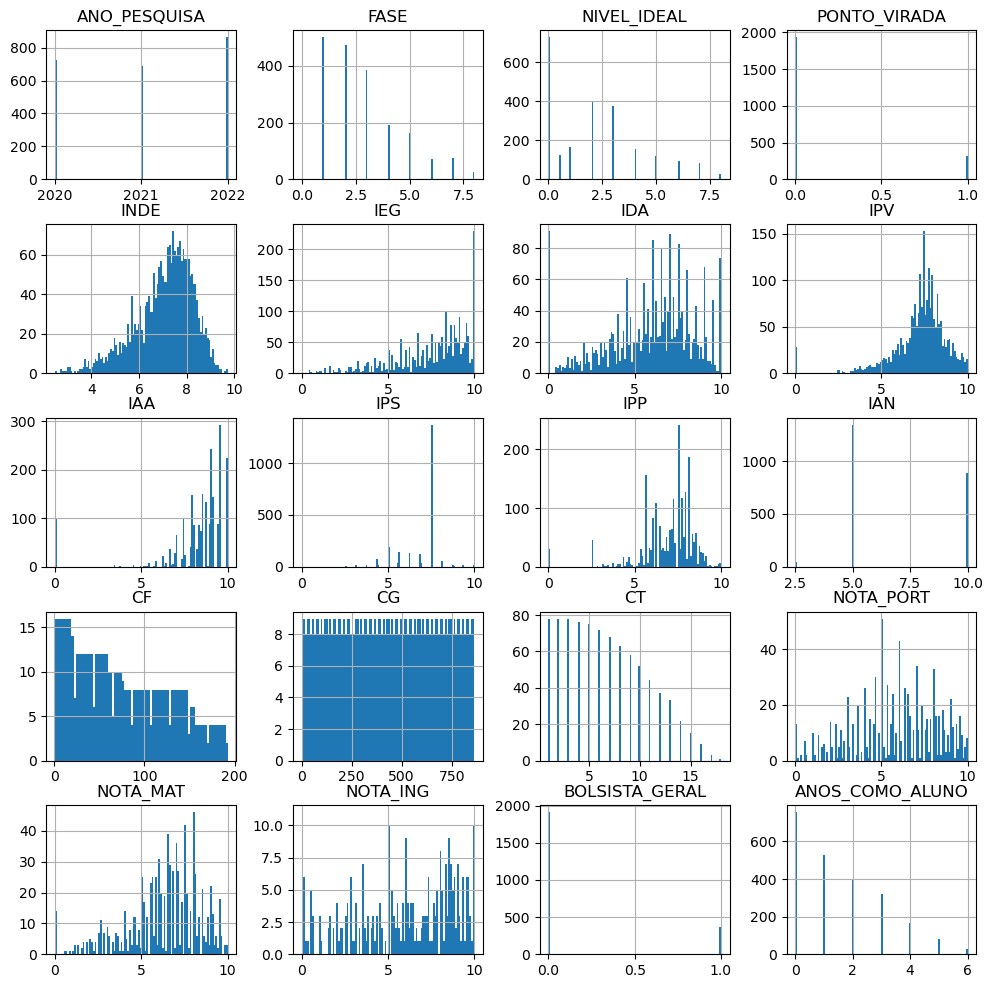

In [504]:
df_tratado.hist(bins=100, figsize=(12, 12))
plt.show()

<Axes: >

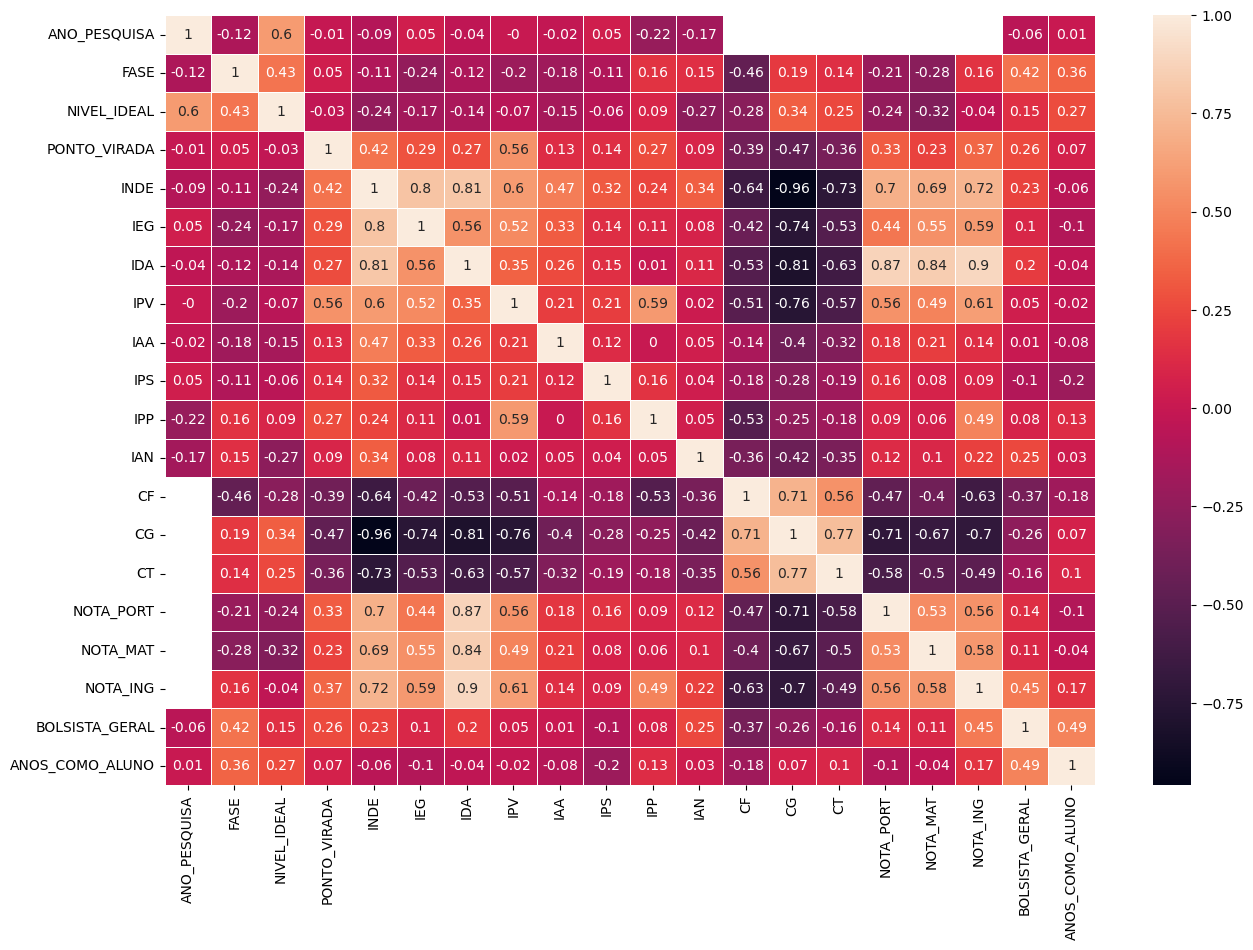

In [515]:
df_numeric = df_tratado.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr().round(2)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [513]:
df_tratado.columns

Index(['NOME', 'ANO_PESQUISA', 'INSTITUICAO_ENSINO_ALUNO', 'FASE', 'TURMA',
       'NIVEL_IDEAL', 'PONTO_VIRADA', 'INDE', 'PEDRA', 'IEG', 'IDA', 'IPV',
       'IAA', 'IPS', 'IPP', 'IAN', 'CF', 'CG', 'CT', 'NOTA_PORT', 'NOTA_MAT',
       'NOTA_ING', 'BOLSISTA_GERAL', 'ANOS_COMO_ALUNO'],
      dtype='object')

<Axes: >

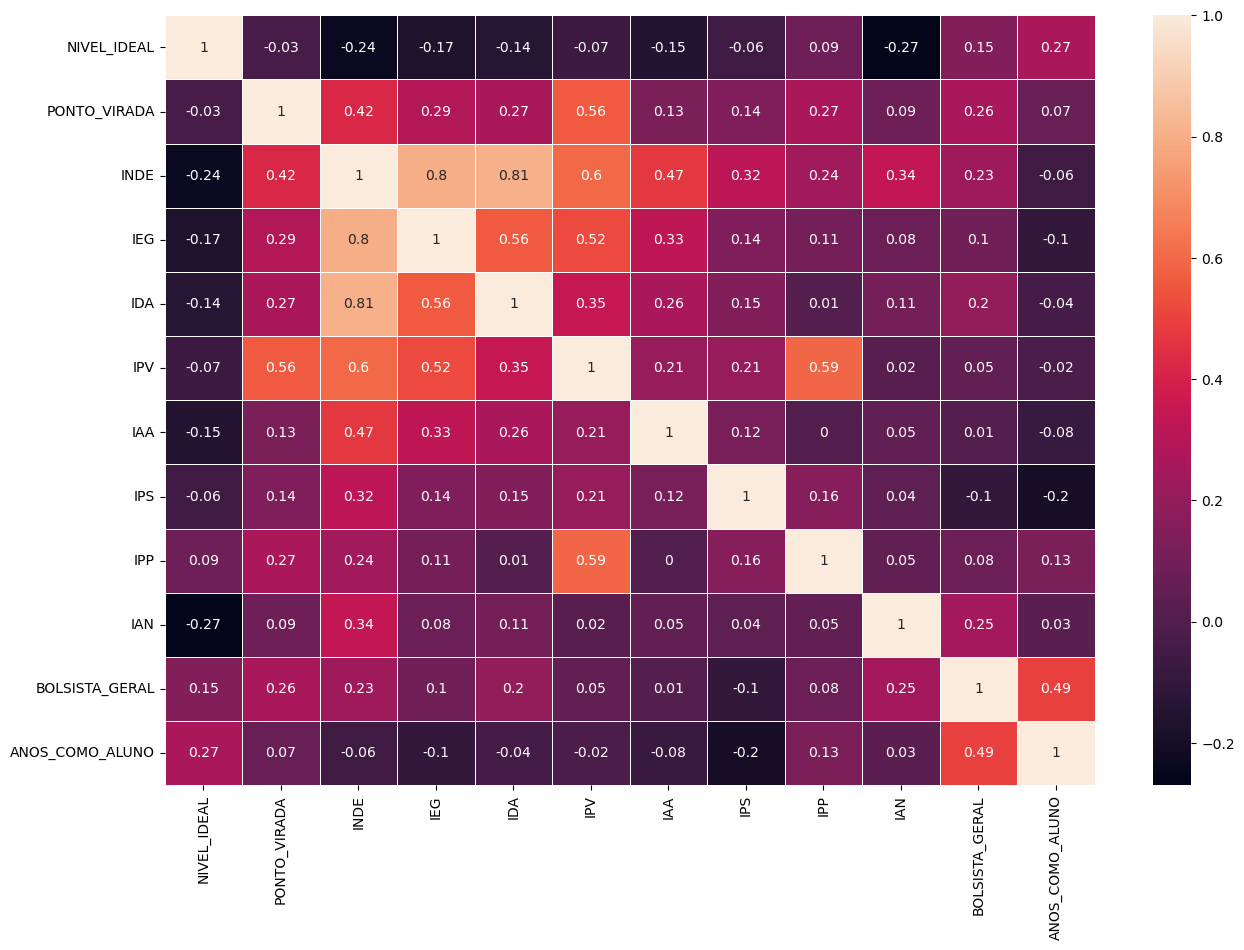

In [512]:
df_filtrado = df_tratado[['NIVEL_IDEAL', 'PONTO_VIRADA', 'INDE', 'IEG', 'IDA', 'IPV', 'IAA', 'IPS', 'IPP', 'IAN', 'BOLSISTA_GERAL', 'ANOS_COMO_ALUNO']]
correlation_matrix = df_filtrado.corr().round(2)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

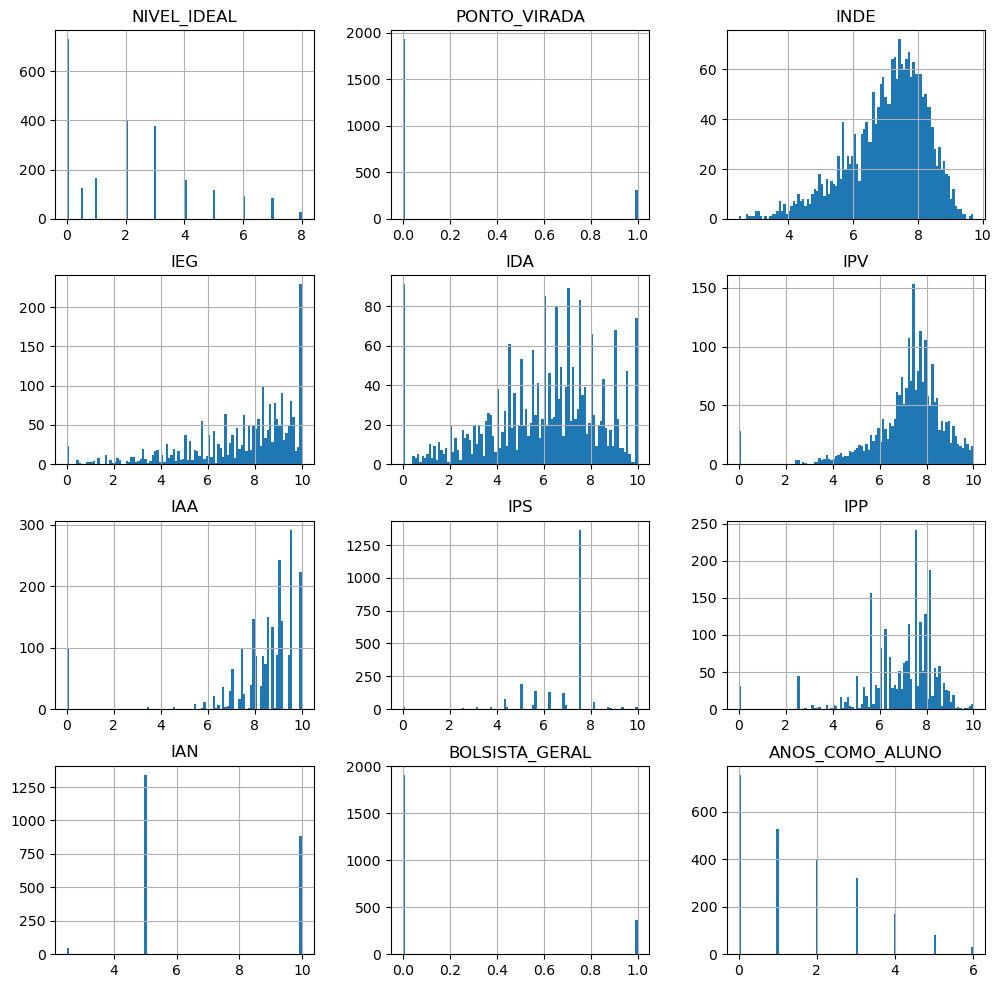

In [531]:
df_filtrado.hist(bins=100, figsize=(12, 12))
plt.show()

## Progressaõ por ano

In [539]:
media_anos_por_bolsista = df_filtrado.groupby('BOLSISTA_GERAL')['ANOS_COMO_ALUNO'].mean()
media_anos_por_bolsista

BOLSISTA_GERAL
0    1.224201
1    3.240437
Name: ANOS_COMO_ALUNO, dtype: float64

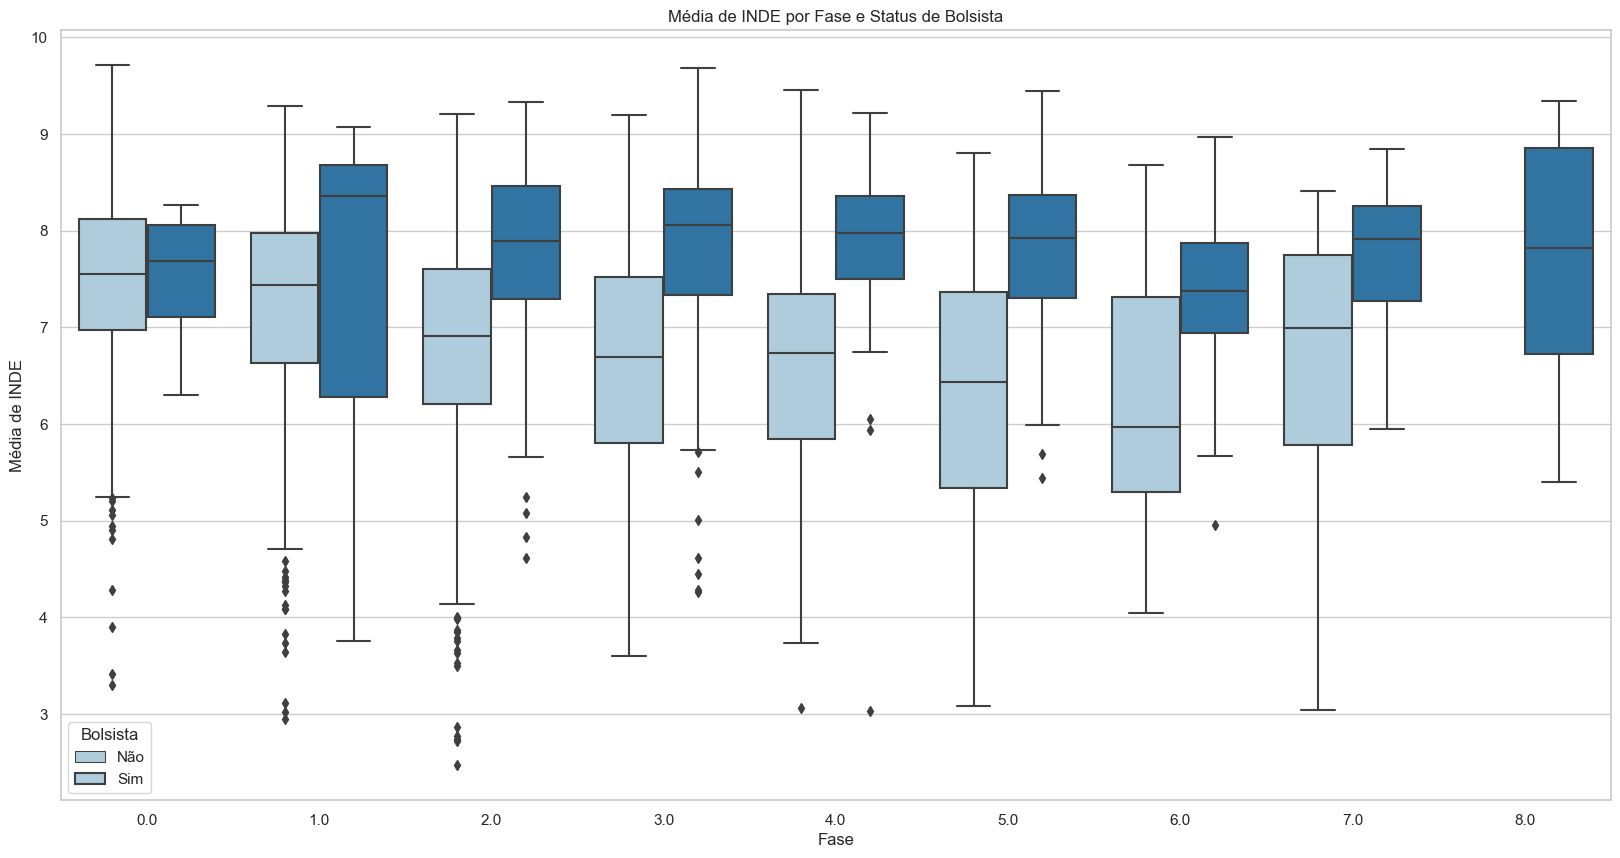

In [574]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='FASE', y='INDE', hue='BOLSISTA_GERAL', data=df_tratado, palette='Paired')
plt.title('Média de INDE por Fase e Status de Bolsista')
plt.xlabel('Fase')
plt.ylabel('Média de INDE')
plt.legend(title='Bolsista', labels=['Não', 'Sim'])
plt.show()

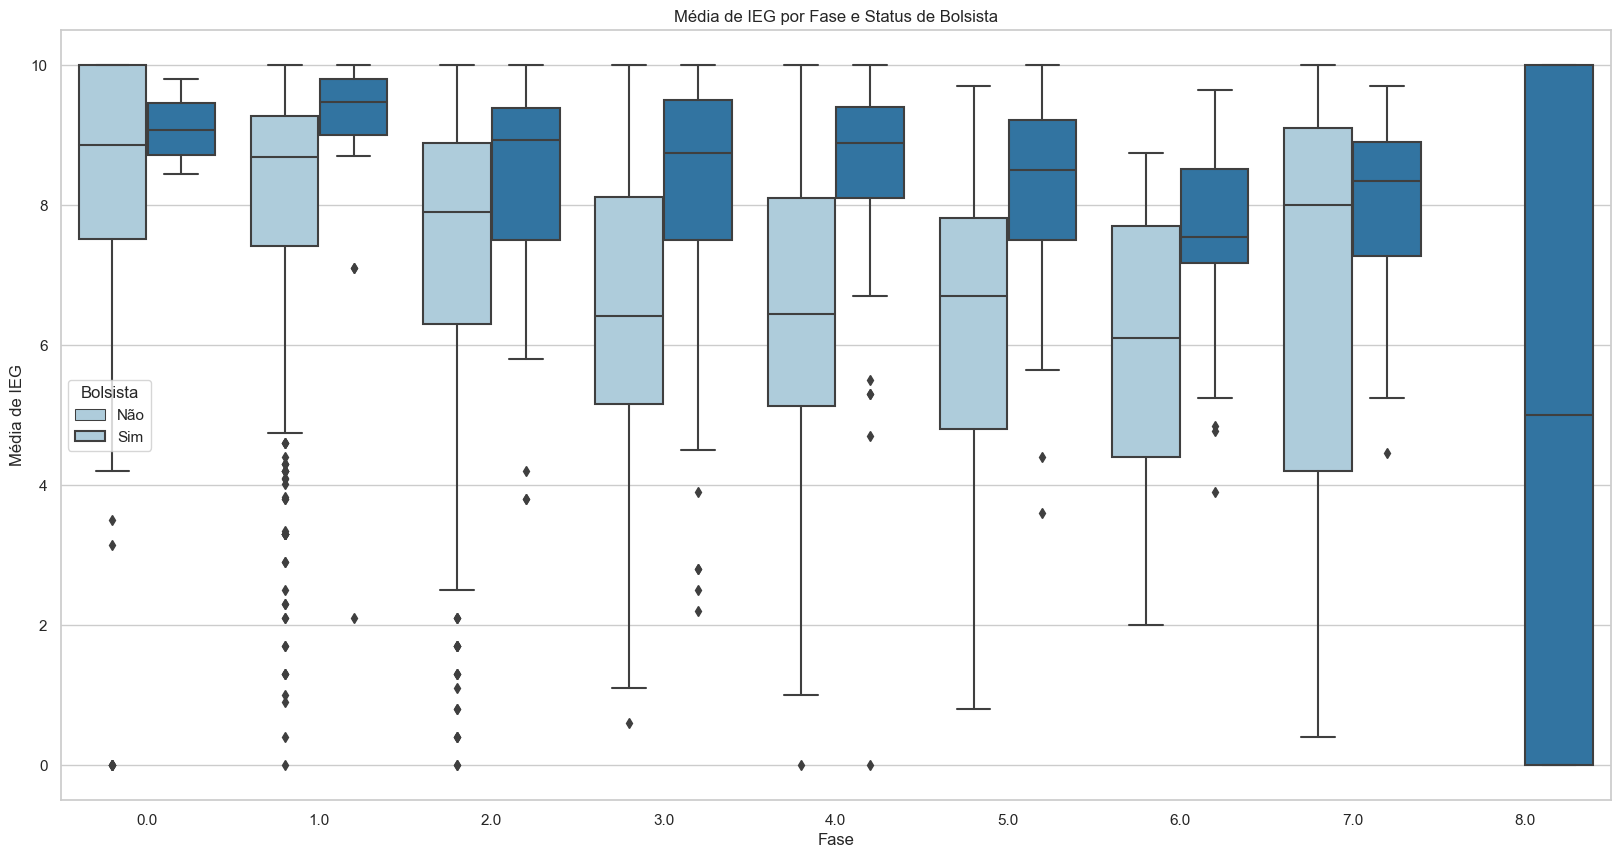

In [576]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='FASE', y='IEG', hue='BOLSISTA_GERAL', data=df_tratado, palette='Paired')
plt.title('Média de IEG por Fase e Status de Bolsista')
plt.xlabel('Fase')
plt.ylabel('Média de IEG')
plt.legend(title='Bolsista', labels=['Não', 'Sim'])
plt.show()

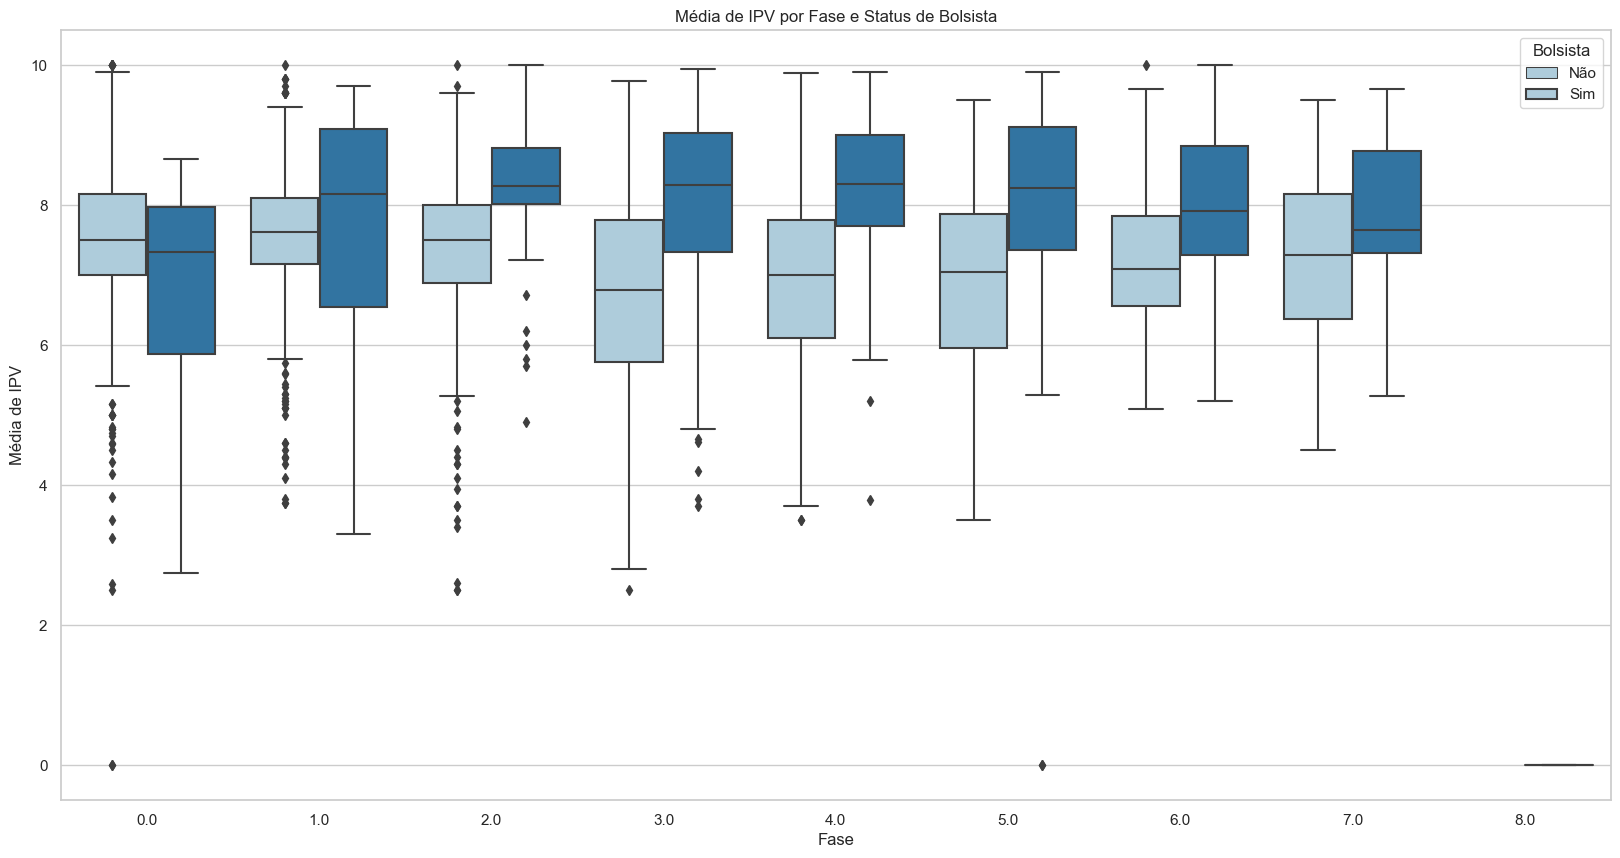

In [577]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='FASE', y='IPV', hue='BOLSISTA_GERAL', data=df_tratado, palette='Paired')
plt.title('Média de IPV por Fase e Status de Bolsista')
plt.xlabel('Fase')
plt.ylabel('Média de IPV')
plt.legend(title='Bolsista', labels=['Não', 'Sim'])
plt.show()

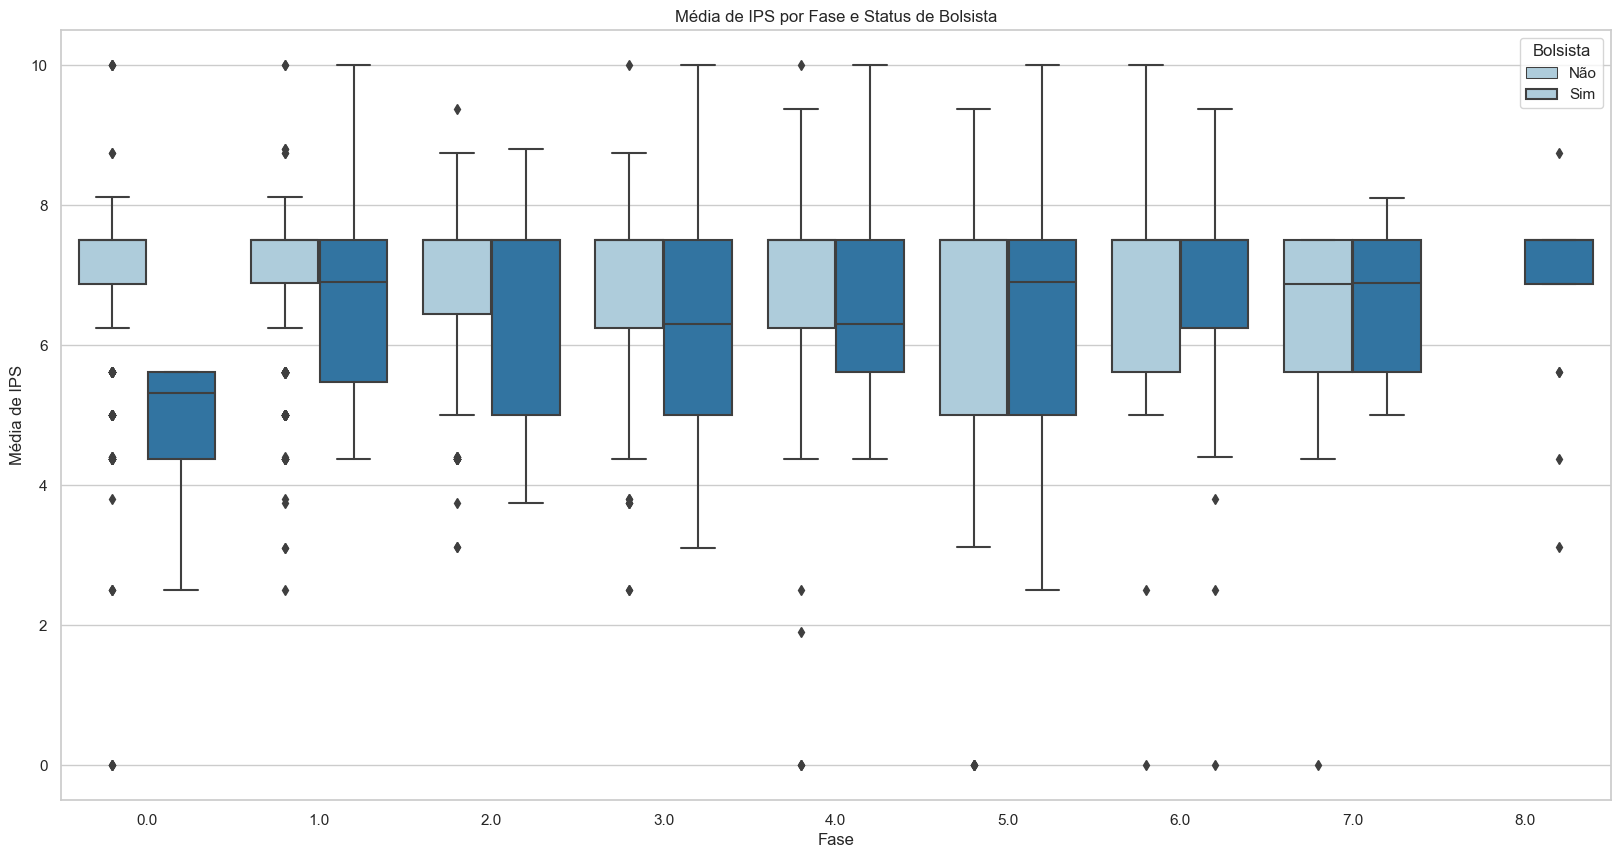

In [578]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='FASE', y='IPS', hue='BOLSISTA_GERAL', data=df_tratado, palette='Paired')
plt.title('Média de IPS por Fase e Status de Bolsista')
plt.xlabel('Fase')
plt.ylabel('Média de IPS')
plt.legend(title='Bolsista', labels=['Não', 'Sim'])
plt.show()

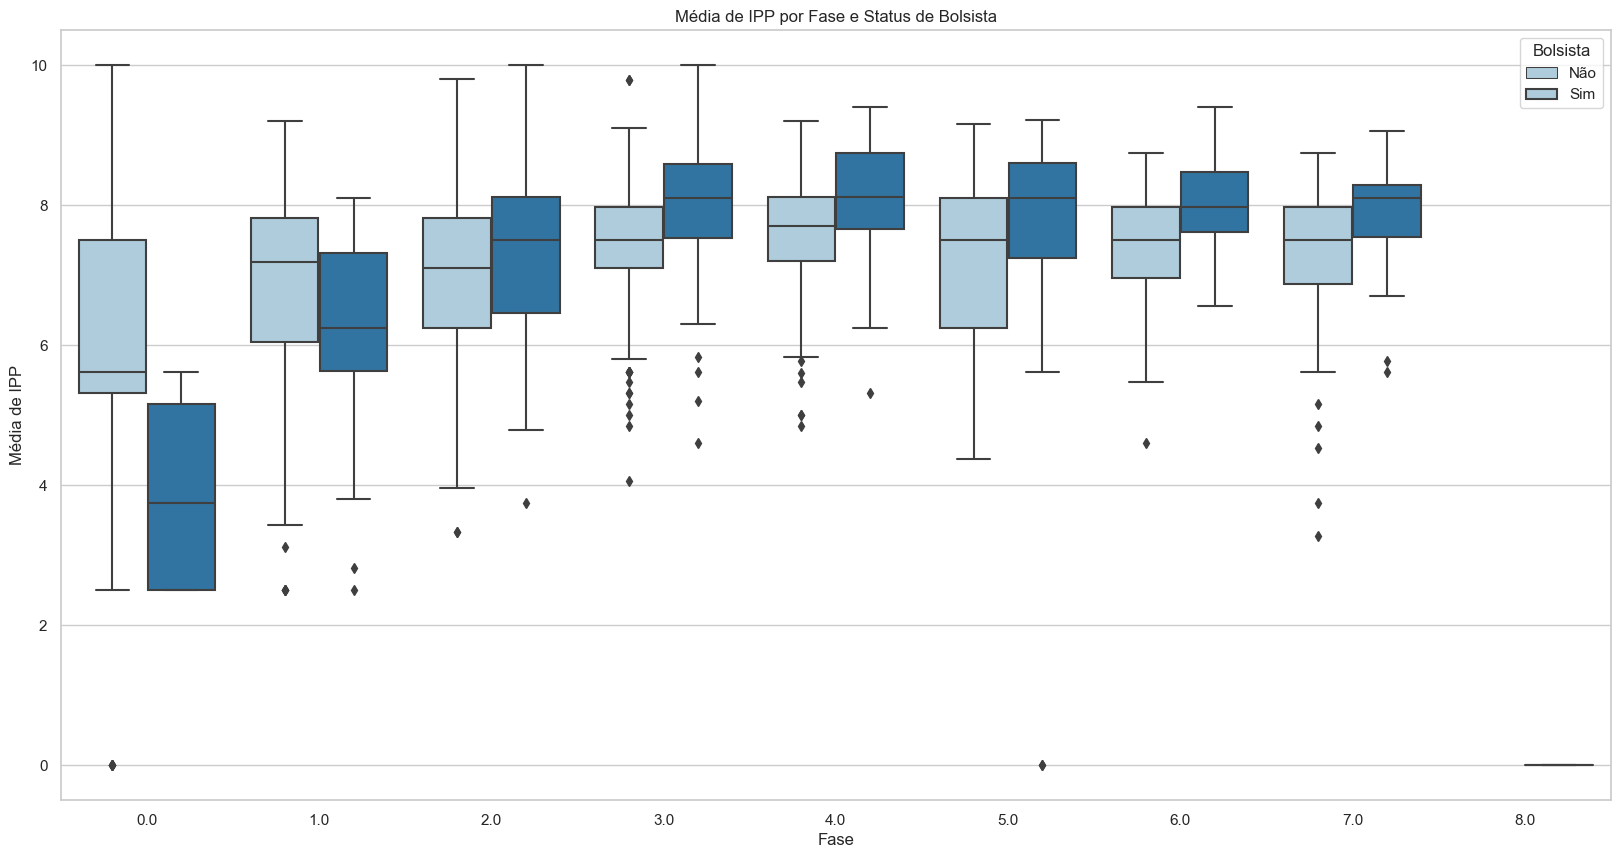

In [579]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='FASE', y='IPP', hue='BOLSISTA_GERAL', data=df_tratado, palette='Paired')
plt.title('Média de IPP por Fase e Status de Bolsista')
plt.xlabel('Fase')
plt.ylabel('Média de IPP')
plt.legend(title='Bolsista', labels=['Não', 'Sim'])
plt.show()

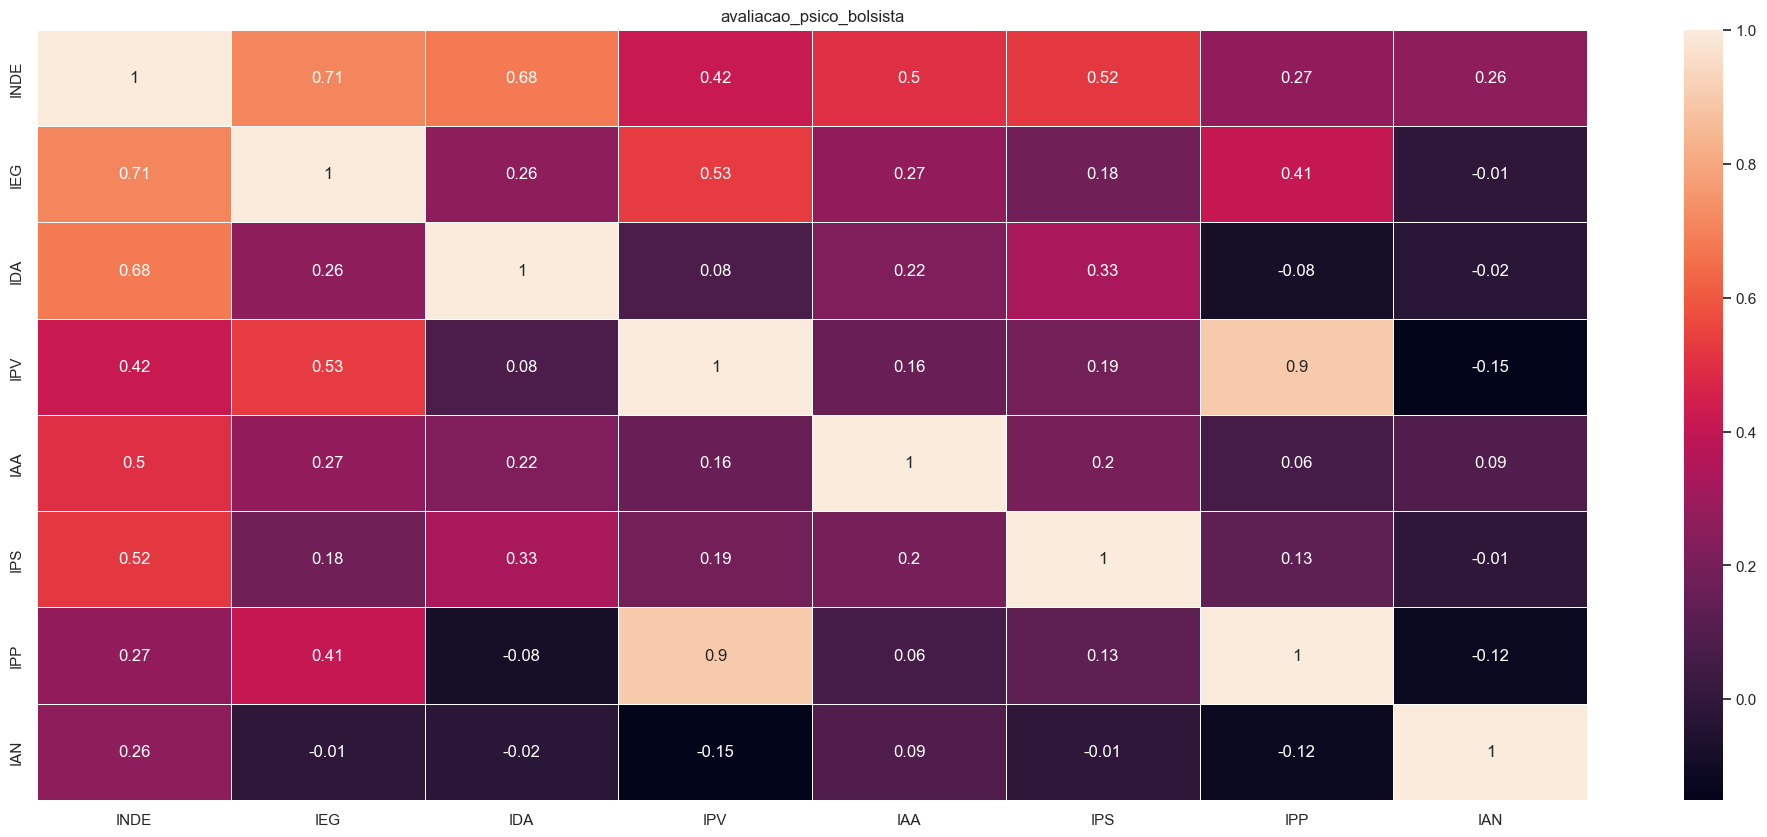

In [571]:
avaliacao_psico_bolsista = df_tratado[df_tratado["BOLSISTA_GERAL"] == 1]
avaliacao_psico_bolsista = avaliacao_psico_bolsista[['INDE', 'IEG', 'IDA', 'IPV', 'IAA', 'IPS', 'IPP', 'IAN']]
correlation_matrix = avaliacao_psico_bolsista.corr().round(2)

fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.title('avaliacao_psico_bolsista')
plt.show()

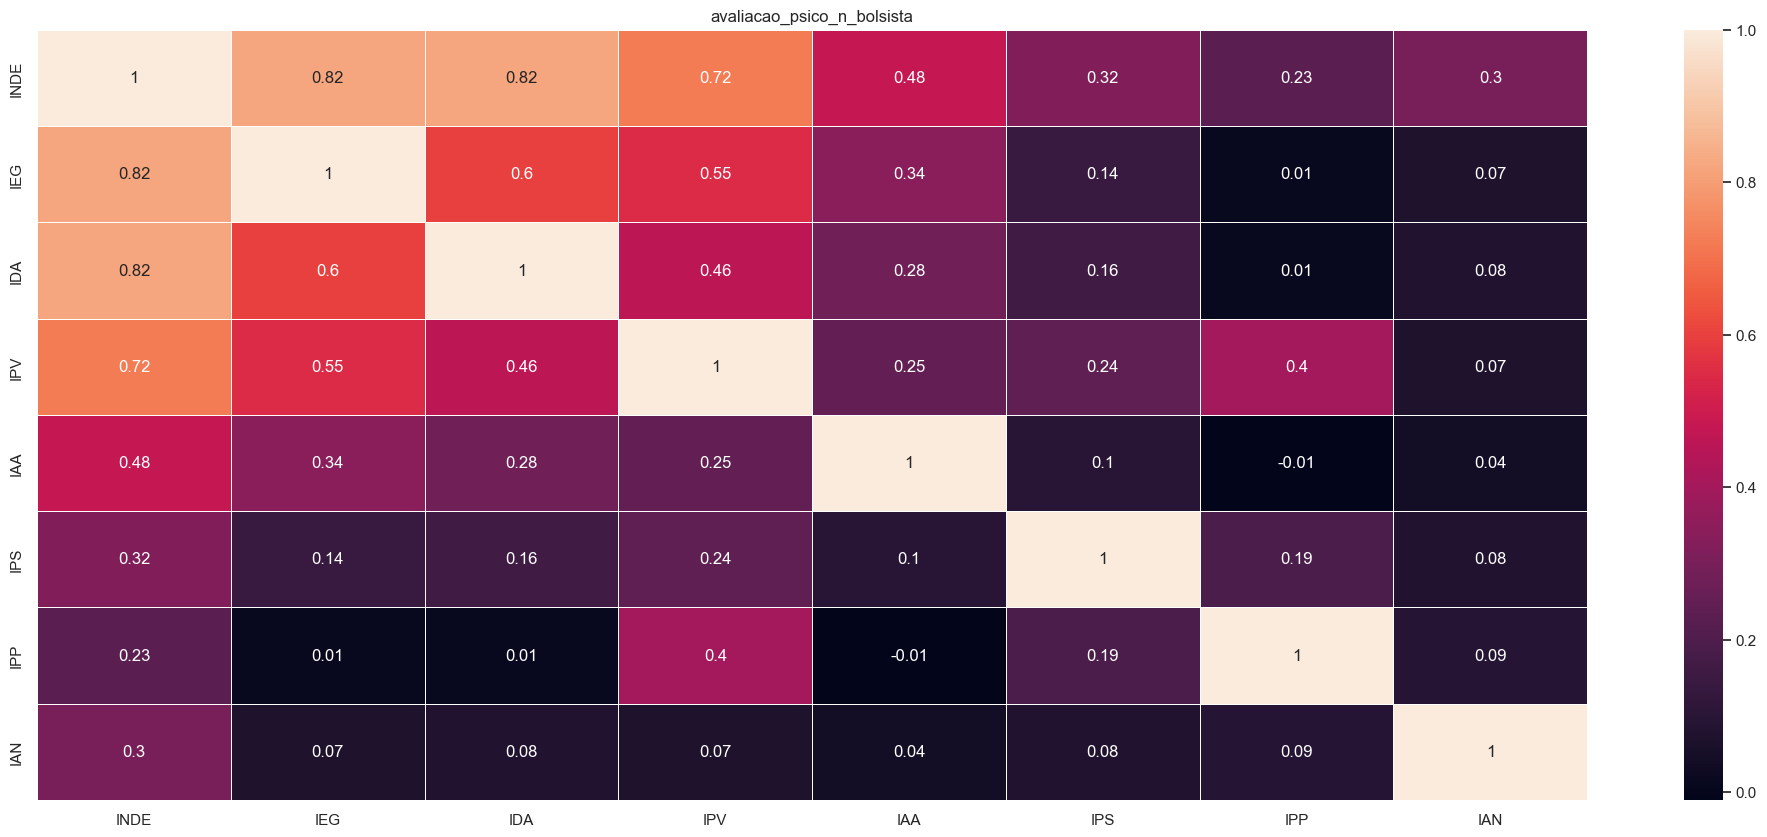

In [570]:
avaliacao_psico_n_bolsista = df_tratado[df_tratado["BOLSISTA_GERAL"] == 0]
avaliacao_psico_n_bolsista = avaliacao_psico_n_bolsista[['INDE', 'IEG', 'IDA', 'IPV', 'IAA', 'IPS', 'IPP', 'IAN']]
correlation_matrix = avaliacao_psico_n_bolsista.corr().round(2)

fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.title('avaliacao_psico_n_bolsista')
plt.show()

In [554]:
overview = df_filtrado.groupby('PONTO_VIRADA')['IPV'].describe()
overview


,count,mean,std,min,25%,50%,75%,max
PONTO_VIRADA,,,,,,,,
0.0,1932.0,7.094863,1.118802,2.500000,6.611102,7.333333,7.833338,9.00000
1.0,315.0,9.165620,0.458470,8.375007,8.833335,9.125005,9.527788,10.00001


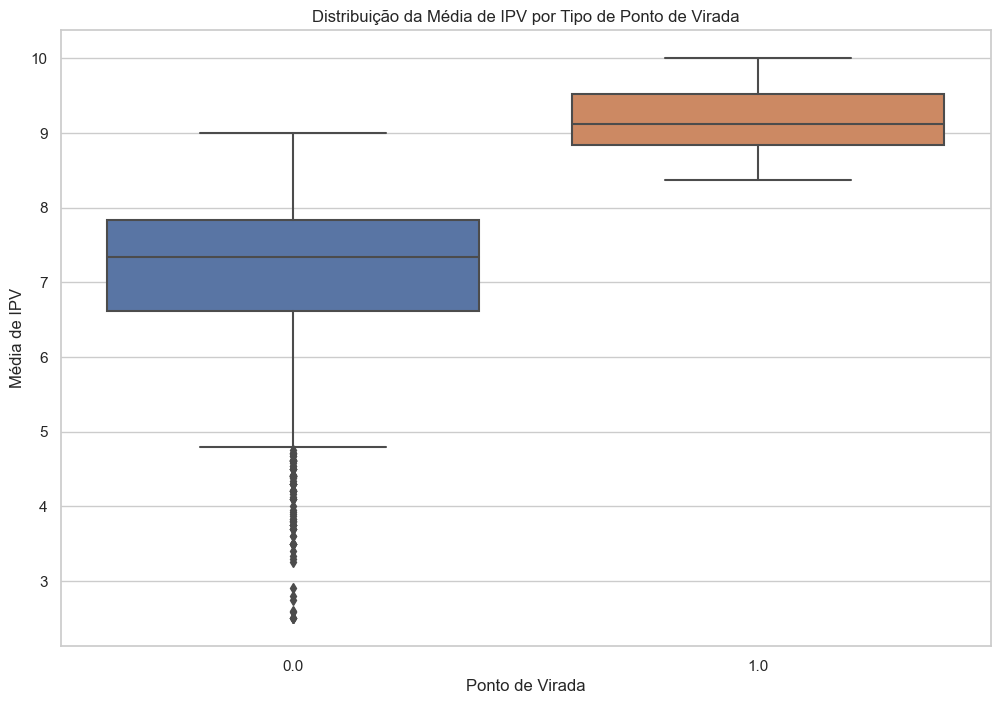

In [555]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='PONTO_VIRADA', y='IPV', data=df_filtrado)
plt.title('Distribuição da Média de IPV por Tipo de Ponto de Virada')
plt.xlabel('Ponto de Virada')
plt.ylabel('Média de IPV')
plt.show()

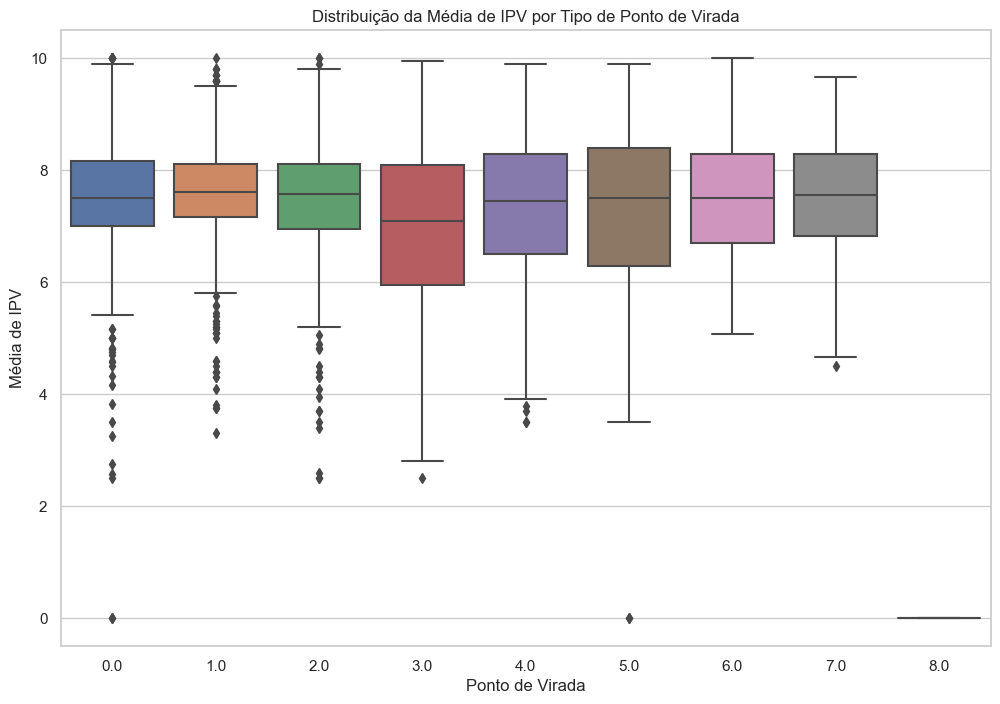

In [557]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='FASE', y='IPV', data=df_tratado)
plt.title('Distribuição da Média de IPV por Tipo de Ponto de Virada')
plt.xlabel('Ponto de Virada')
plt.ylabel('Média de IPV')
plt.show()